In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/farm.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/07/14,30.40,30.033333,29.76,29.965,30.153333,30.1325,30.334,30.446667
2017/07/13,29.85,29.616667,29.64,29.985,30.093333,30.1675,30.352,30.476667
2017/07/12,29.85,29.516667,29.61,30.115,30.090000,30.2250,30.392,30.481667
2017/07/11,29.15,29.500000,29.69,30.140,30.100000,30.3000,30.432,30.501667
2017/07/10,29.55,29.683333,30.03,30.300,30.180000,30.4075,30.514,30.563333


In [7]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/07/14,0.000000,0.000000,0.0,0.0
2017/07/13,0.018425,0.000000,0.0,0.0
2017/07/12,0.000000,0.000000,0.0,0.0
2017/07/11,0.024014,0.018079,0.0,0.0
2017/07/10,-0.013536,-0.002246,0.0,0.0


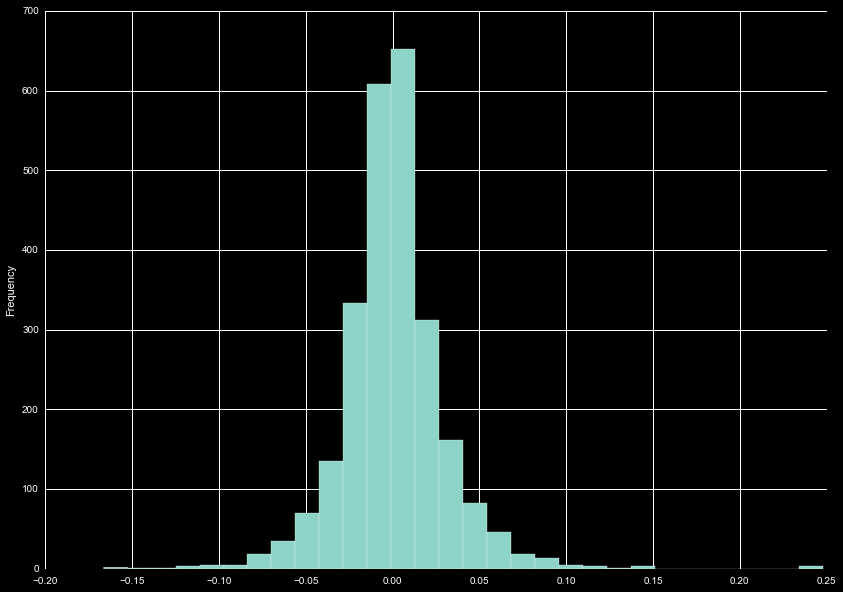

In [8]:
bar['close'].plot.hist( bins=30 )

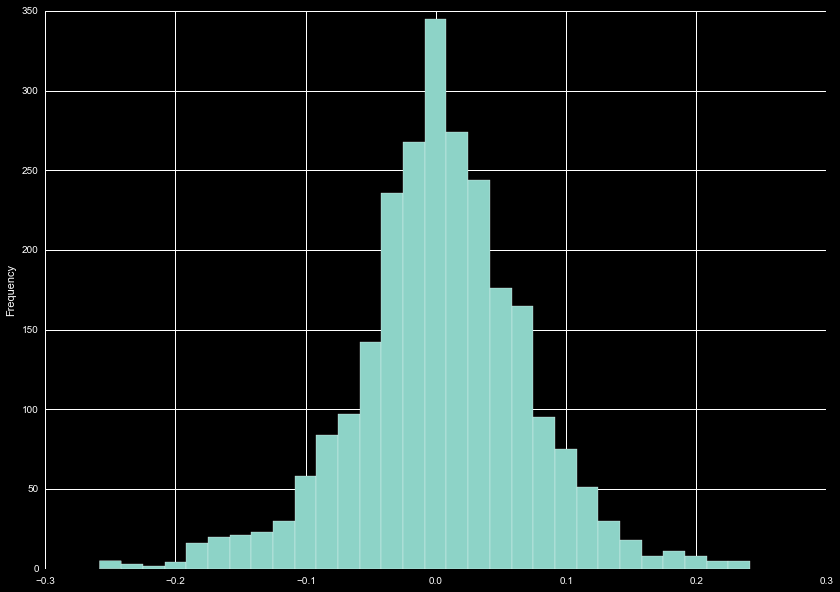

In [9]:
bar['close_mean_10'].plot.hist( bins=30 )

In [10]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.003714
std         0.066871
min        -0.258311
25%        -0.032423
50%         0.003393
75%         0.042892
max         0.241374
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


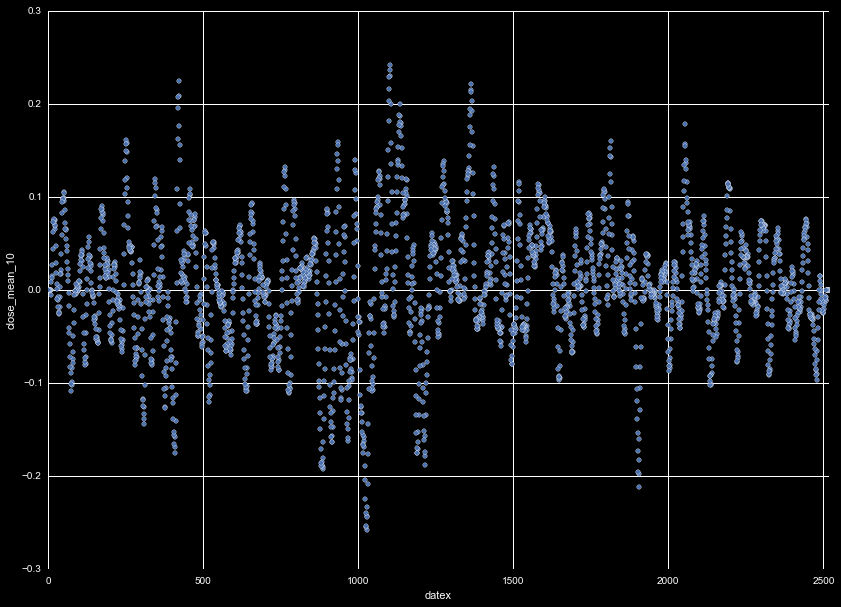

In [11]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [12]:
foobar = bar.join( diffs, how='inner' )

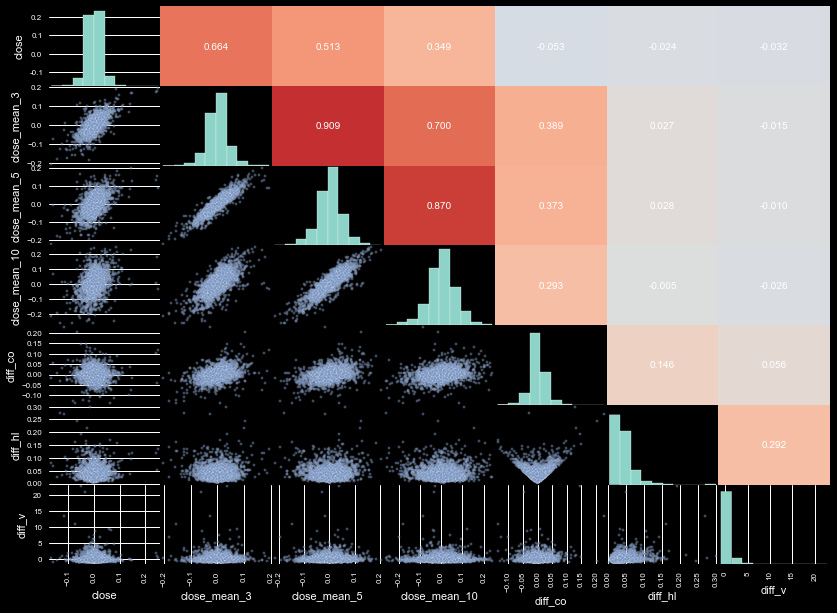

In [13]:
dv.corr_plot( foobar, corr_method = 'pearson')

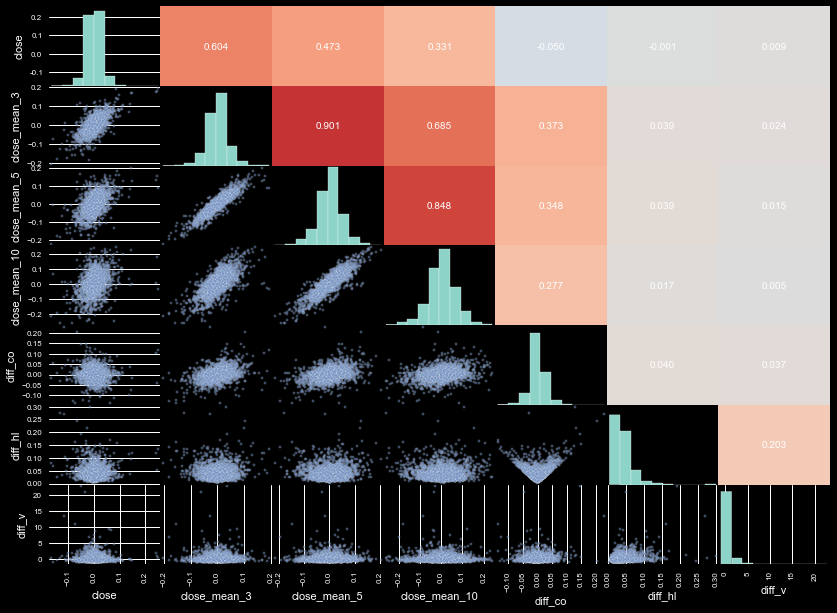

In [14]:
dv.corr_plot( foobar )

In [15]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.053204
diff_hl   -0.023520
diff_v    -0.031573
dtype: float64
diff_co    0.388527
diff_hl    0.027495
diff_v    -0.014933
dtype: float64
diff_co    0.373268
diff_hl    0.027634
diff_v    -0.009514
dtype: float64
diff_co    0.293182
diff_hl   -0.004714
diff_v    -0.026498
dtype: float64


In [16]:
# Diffs appear to be useful

In [17]:
foobar = bar.join( moms, how='inner' )

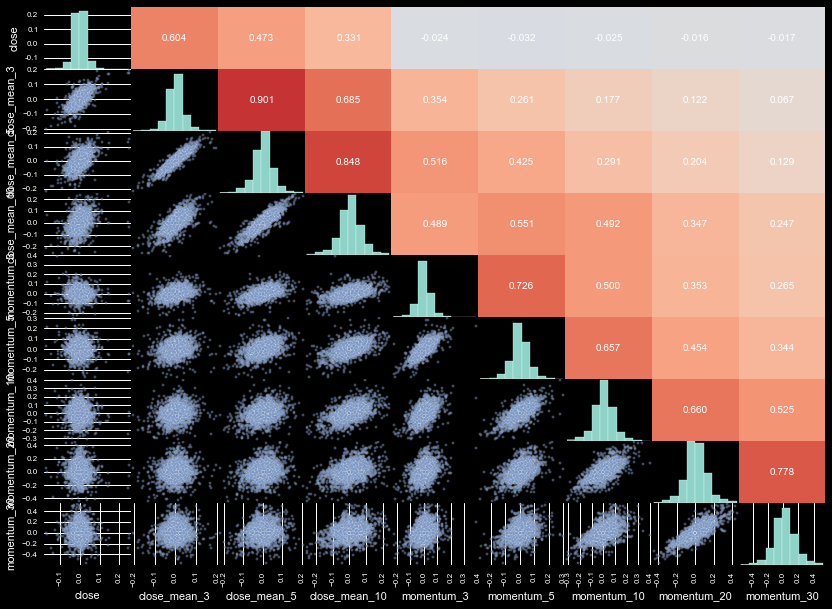

In [18]:
dv.corr_plot( foobar )

In [19]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.056485
momentum_5    -0.063735
momentum_10   -0.036444
momentum_20   -0.030975
momentum_30   -0.024119
dtype: float64
momentum_3     0.336611
momentum_5     0.247428
momentum_10    0.187022
momentum_20    0.131966
momentum_30    0.097525
dtype: float64
momentum_3     0.520389
momentum_5     0.438804
momentum_10    0.319111
momentum_20    0.229446
momentum_30    0.173409
dtype: float64
momentum_3     0.494145
momentum_5     0.572605
momentum_10    0.529249
momentum_20    0.378484
momentum_30    0.307518
dtype: float64


In [20]:
# Momentum 3 5 and 10 do decent job

In [21]:
foobar = bar.join( rsi, how='inner' )

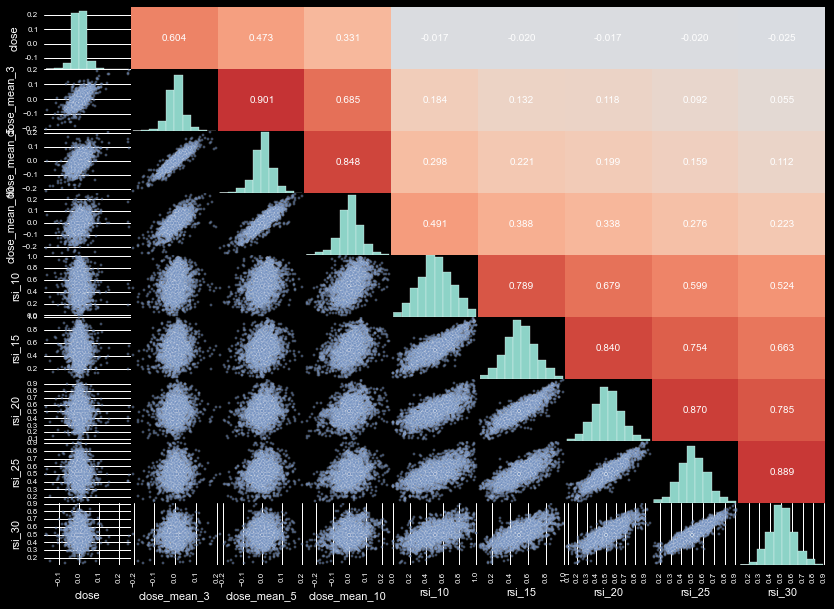

In [22]:
dv.corr_plot( foobar )

In [23]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.023348
rsi_15   -0.028872
rsi_20   -0.023693
rsi_25   -0.025478
rsi_30   -0.027836
dtype: float64
rsi_10    0.177379
rsi_15    0.134732
rsi_20    0.121354
rsi_25    0.102033
rsi_30    0.076467
dtype: float64
rsi_10    0.298343
rsi_15    0.234325
rsi_20    0.208350
rsi_25    0.173863
rsi_30    0.141868
dtype: float64
rsi_10    0.486834
rsi_15    0.394296
rsi_20    0.341653
rsi_25    0.289767
rsi_30    0.259306
dtype: float64


In [24]:
# RSI 10, 15 good

In [37]:
bands = bands.replace([np.inf, -np.inf], np.nan)

In [38]:
foobar = bar.join( bands, how='inner' )

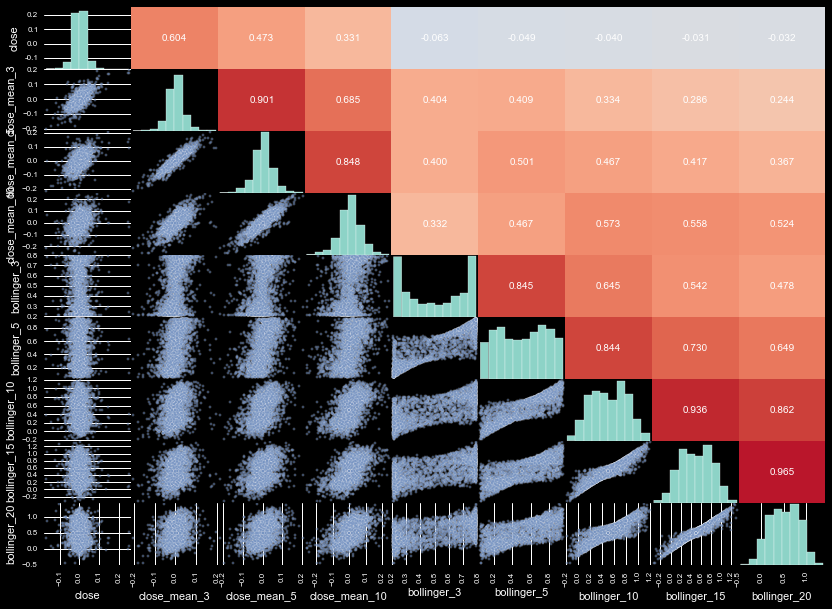

In [39]:
dv.corr_plot( foobar )

In [40]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.045068
bollinger_5    -0.041050
bollinger_10   -0.042031
bollinger_15   -0.039919
bollinger_20   -0.044388
dtype: float64
bollinger_3     0.373270
bollinger_5     0.380427
bollinger_10    0.321836
bollinger_15    0.284324
bollinger_20    0.245969
dtype: float64
bollinger_3     0.385091
bollinger_5     0.479665
bollinger_10    0.461700
bollinger_15    0.424303
bollinger_20    0.378801
dtype: float64
bollinger_3     0.327954
bollinger_5     0.454176
bollinger_10    0.555978
bollinger_15    0.548525
bollinger_20    0.520656
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days